# CAS Data Engineering FHNW 
## Data Wrangling Module - Author F.Burnelli

## Use wrangling_docs env

### Text Exercise

conda env create -f env_ex7.yml

python -m ipykernel install --user --name wrangling --display-name "Python (wrangling)"


In [10]:
!pip install pymupdf

  Obtaining dependency information for pymupdf from https://files.pythonhosted.org/packages/3f/42/0356bfa80e6df101c11ea5f89b8bdbaee0a8cb991e824c95494b0c97ea9f/PyMuPDF-1.24.9-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for PyMuPDFb==1.24.9 from https://files.pythonhosted.org/packages/b7/4b/a096c85287b6a72adde950b9850d8cd5adea20b7a03630408d71367cda31/PyMuPDFb-1.24.9-py3-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 57.6 MB/s eta 0:00:0000:0100:01


In [42]:
import easyocr
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import  fitz #PyMuPDF
import os


## Native pdf

In [26]:
# Open the PDF file
pdf_name = "factsheet-cas-data-engineering-ht-fhnw-de.pdf"
doc = fitz.open(pdf_name)


# Extract all text page by page, checkout the order


In [14]:
text = ""
for page_num in range(len(doc)):
    page = doc.load_page(page_num)  # loads each page
    text += page.get_text()  # extract text from the page

doc.close()  # Close the PDF file


In [ ]:
print(text)

## Extract the images 

In [27]:
doc = fitz.open(pdf_path)
for page_num in range(len(doc)):
    page = doc[page_num]
    image_list = page.get_images(full=True)
    
    # Loop through each image
    for image_index, img in enumerate(image_list, start=1):
        xref = img[0]
        # Extract the image bytes
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]
        
        # Define the output path
        image_filename = f"{pdf_name}page_{page_num+1}_image_{image_index}.{image_ext}"
        image_path = image_filename
        
        # Write the image to a file
        with open(image_path, "wb") as image_file:
            image_file.write(image_bytes)

doc.close()  # Close the PDF file


## Now try on your docs

## OCR

In [30]:
reader = easyocr.Reader(['en'])


In [32]:
extracted_text = reader.readtext('scanned_page_1.png')


### explore output  (first 4 elements)
- Bounding Boxes coordinates
- text
- confidence

In [37]:
for (bbox,text,prob) in extracted_text[0:3]:
    print((bbox,text,prob))

([[182, 38], [441, 38], [441, 55], [182, 55]], 'Fachhochschule Nordwestschweiz', 0.7826038744100219)
([[55, 25], [167, 25], [167, 87], [55, 87]], 'njw', 0.6390215158462524)
([[181, 53], [357, 53], [357, 73], [181, 73]], 'Hochschule fir Technik', 0.8772707215535162)


### is it the text alway correctly extracted?

In [40]:
ocr_text = ""
for (bbox,text,prob) in extracted_text:
    print(text)
    ocr_text = ocr_text + " " +text

## Word Cloud Analysis

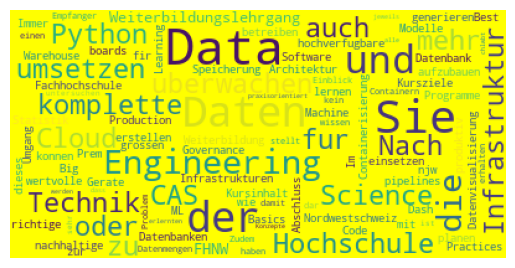

In [45]:
text = ocr_text
wordcloud = WordCloud().generate(text)


wordcloud = WordCloud(background_color="yellow",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()